# EDA

--------------------------------------------------------------------------------

In [2]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# set seaborn style
sns.set_theme(context='paper', style='whitegrid')

In [4]:
# load the data
df1 = pd.read_csv('data/location1.csv')
df2 = pd.read_csv('data/location2.csv')
df3 = pd.read_csv('data/location3.csv')
df4 = pd.read_csv('data/location4.csv')

In [5]:
# check that reading the files worked as intended
df1.head()

,Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power
0,2017-01-02 00:00:00,28.5,85,24.5,1.44,1.26,146,162,1.4,0.1635
1,2017-01-02 01:00:00,28.4,86,24.7,2.06,3.99,151,158,4.4,0.1424
2,2017-01-02 02:00:00,26.8,91,24.5,1.30,2.78,148,150,3.2,0.1214
3,2017-01-02 03:00:00,27.4,88,24.3,1.30,2.69,58,105,1.6,0.1003
4,2017-01-02 04:00:00,27.3,88,24.1,2.47,4.43,58,84,4.0,0.0793


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43800 entries, 0 to 43799
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Time                 43800 non-null  object 
 1   temperature_2m       43800 non-null  float64
 2   relativehumidity_2m  43800 non-null  int64  
 3   dewpoint_2m          43800 non-null  float64
 4   windspeed_10m        43800 non-null  float64
 5   windspeed_100m       43800 non-null  float64
 6   winddirection_10m    43800 non-null  int64  
 7   winddirection_100m   43800 non-null  int64  
 8   windgusts_10m        43800 non-null  float64
 9   Power                43800 non-null  float64
dtypes: float64(6), int64(3), object(1)
memory usage: 3.3+ MB


In [7]:
df1.describe()

,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power
count,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000
mean,47.862911,72.288744,38.569308,3.591147,6.284431,203.637329,203.343676,7.771795,0.405385
std,19.453691,16.852287,18.772110,1.649318,2.685216,96.371262,97.959852,3.569147,0.288322
min,-14.400000,18.000000,-17.100000,0.000000,0.100000,1.000000,0.000000,0.500000,0.000000
25%,32.100000,60.000000,24.300000,2.410000,4.380000,132.000000,130.000000,5.000000,0.148900
50%,47.300000,74.000000,38.100000,3.300000,6.080000,225.000000,226.000000,7.200000,0.347650
75%,64.500000,86.000000,54.700000,4.590000,7.990000,277.000000,278.000000,10.000000,0.659600
max,94.100000,100.000000,76.300000,13.450000,20.650000,360.000000,360.000000,29.200000,0.991300


Everything seems to be in order with the first dataframe.

## Missing Values

In [8]:
df1.isnull().sum()

Time                   0
temperature_2m         0
relativehumidity_2m    0
dewpoint_2m            0
windspeed_10m          0
windspeed_100m         0
winddirection_10m      0
winddirection_100m     0
windgusts_10m          0
Power                  0
dtype: int64

In [9]:
df2.isnull().sum()

Time                   0
temperature_2m         0
relativehumidity_2m    0
dewpoint_2m            0
windspeed_10m          0
windspeed_100m         0
winddirection_10m      0
winddirection_100m     0
windgusts_10m          0
Power                  0
dtype: int64

In [10]:
df3.isnull().sum()

Time                   0
temperature_2m         0
relativehumidity_2m    0
dewpoint_2m            0
windspeed_10m          0
windspeed_100m         0
winddirection_10m      0
winddirection_100m     0
windgusts_10m          0
Power                  0
dtype: int64

In [11]:
df4.isnull().sum()

Time                   0
temperature_2m         0
relativehumidity_2m    0
dewpoint_2m            0
windspeed_10m          0
windspeed_100m         0
winddirection_10m      0
winddirection_100m     0
windgusts_10m          0
Power                  0
dtype: int64

None of the four dataframes misses entries.

## Duplicates

In [12]:
df1.duplicated().sum()

0

In [13]:
df2.duplicated().sum()

0

In [14]:
df3.duplicated().sum()

0

In [15]:
df4.duplicated().sum()

0

None of the four dataframes contains duplicated entries.

## Time Column and Index

The `Time` column is the only `object`-type column in our dataframes.
Let's convert it into a proper `datetime` type.

In [16]:
for frame in [df1, df2, df3, df4]:
    frame['Time'] = pd.to_datetime(frame['Time'])

In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43800 entries, 0 to 43799
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Time                 43800 non-null  datetime64[ns]
 1   temperature_2m       43800 non-null  float64       
 2   relativehumidity_2m  43800 non-null  int64         
 3   dewpoint_2m          43800 non-null  float64       
 4   windspeed_10m        43800 non-null  float64       
 5   windspeed_100m       43800 non-null  float64       
 6   winddirection_10m    43800 non-null  int64         
 7   winddirection_100m   43800 non-null  int64         
 8   windgusts_10m        43800 non-null  float64       
 9   Power                43800 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int64(3)
memory usage: 3.3 MB


Also, because we want to compare the locations with each other, let's create
a combined dataframe.

In [18]:
df1['Location'] = 'Location 1'
df2['Location'] = 'Location 2'
df3['Location'] = 'Location 3'
df4['Location'] = 'Location 4'
df = pd.concat([
    df1,
    df2,
    df3,
    df4
], axis=0).reset_index()

## Correlations

Our ultimate goal is going to be making predictions on the `Power` output.
So let's have a quick check on its correlation coefficient with the other features.

In [21]:
corr1 = pd.DataFrame(df1.corr(numeric_only=True)['Power'].sort_values(ascending=False)[1:]).reset_index()
corr2 = pd.DataFrame(df2.corr(numeric_only=True)['Power'].sort_values(ascending=False)[1:]).reset_index()
corr3 = pd.DataFrame(df3.corr(numeric_only=True)['Power'].sort_values(ascending=False)[1:]).reset_index()
corr4 = pd.DataFrame(df4.corr(numeric_only=True)['Power'].sort_values(ascending=False)[1:]).reset_index()


In [22]:
corr1['Location'] = 'Location 1'
corr2['Location'] = 'Location 2'
corr3['Location'] = 'Location 3'
corr4['Location'] = 'Location 4'

In [23]:
corr_all = pd.concat([
    corr1,
    corr2,
    corr3,
    corr4
], axis=0)

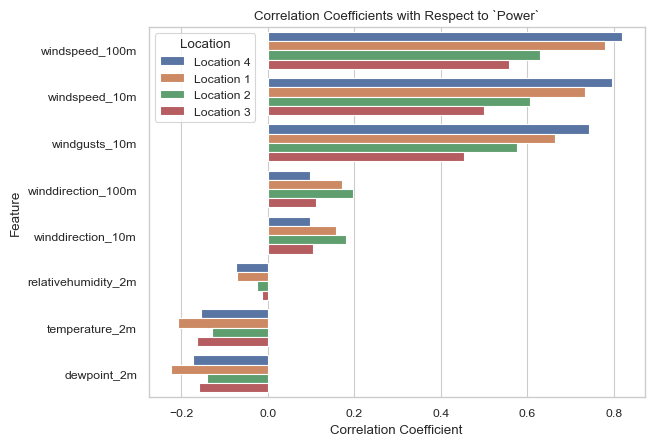

In [25]:
sns.barplot(corr_all.sort_values('Power', ascending=False), x='Power', y='index', hue='Location')
plt.title('Correlation Coefficients with Respect to `Power`')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Feature')
plt.show()

All four locations show a similar influence of each individual factor, though
there are notable differences between said locations.  For instance, location
4 benefits far more from the wind parameters than, say location 3, although
the influcence of temperature and humidity seems to be very similar.

There can be many explanations for that; from different hardware, age, state of
maintenance over sensor reliability to actual demand of the power grid and
maybe even the decision to turn individual wind turbines off temporarily.
We have no actual information on those four locations other than what we find
in the data files themselves.

## Power Levels over Time

There is a lot of data to display here; a simple line plot doesn't reveal
anything useful just like that:

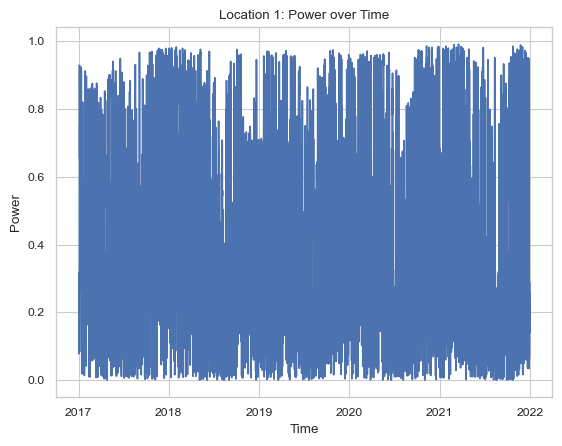

In [51]:
sns.lineplot(df1.Power)
plt.title('Location 1: Power over Time')
plt.show()

Instead, we should try to compare the locations over small time periods like
sesonal power output, maybe day-night cycles, have a look at the average power
output and so on.

For mapping the dime data to a season, we'll use a very simple mapping.
Since we're looking at power plants located in Germany, we'll apply seasons
as they occur on the northern hemisphere.

In [35]:
def season(time):
    match time.month, time.day:
        case 3, below_21 if below_21 < 21:
            return 'Winter'
        case spring_month, _ if spring_month in [3, 4, 5]:
            return 'Spring'
        case 6, below_21 if below_21 < 21:
            return 'Spring'
        case summer_month, _ if summer_month in [6, 7, 8]:
            return 'Summer'
        case 9, below_21 if below_21 < 21:
            return 'Summer'
        case fall_month, _ if fall_month in [9, 10, 11]:
            return 'Fall'
        case 12, below_21 if below_21 < 21:
            return 'Fall'
        case winter_month, _ if winter_month in [1, 2, 12]:
            return 'Winter'

For the time of day, it would be interesting to see not only day and night,
but also business periods.  Thus, we introduce a few more categories for that:

In [47]:
def time_of_day(time):
    match time.hour:
        case business if 9 <= business and business <= 17:
            return '9 to 5'
        case afternoon if 17 <= afternoon and afternoon <= 22:
            return 'Afternoon'
        case night if 22 <= night or night <= 5:
            return 'Night'
        case morning if 5 <= morning and morning <= 9:
            return 'Morning'

Of course, weekends play a similarly important role, as the `'9 to 5'` period
has less of a business-related role on those.

In [49]:
def is_weekend(time): return time.weekday() > 4

And so would vacation periods in Germany.  But adding those as well would
go beyond this exercise, so we don't consider those in our analysis.

Putting it all together, we create a few new columns:

In [50]:
df['Season'] = df.Time.map(season)

In [51]:
df['Time of Day'] = df.Time.map(time_of_day)

In [52]:
df['Weekend?'] = df.Time.map(is_weekend)

In [57]:
df['Year'] = df.Time.dt.year

In [58]:
df['Month'] = df.Time.dt.month

We can use those features to compare, say, the average power production
in summer 2020:

In [75]:
example = df[(df.Year==2020) & (df.Season=='Summer')].groupby(['Time of Day', 'Location', 'Month']).mean('Power')['Power'].reset_index()

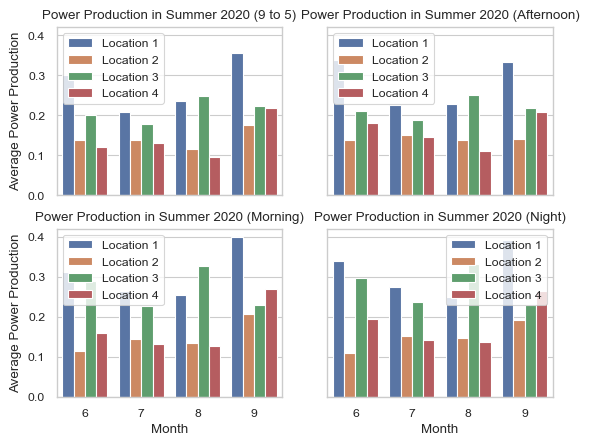

In [87]:
plt.subplots(2, 2, sharex=True, sharey=True)
for idx, tod in enumerate(example['Time of Day'].unique()):
    plt.subplot(2, 2, idx+1)
    sns.barplot(example[example['Time of Day']==tod], x='Month', y='Power', hue='Location')
    plt.xlabel('Month')
    plt.ylabel('Average Power Production')
    plt.legend()
    plt.title(f'Power Production in Summer 2020 ({tod})')
plt.show()

Now that in itself is neither interesting nor insightful.  At least so long
as we don't generalize this observation and create a more complete overview.